# California Housing Prices

In [1]:
#importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

In [2]:
#selecionando paleta de cores
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5 = '#212529', '#495057', '#adb5bd', '#dee2e6', '#f8f9fa'

In [3]:
#lendo os dados
df = pd.read_csv('https://raw.githubusercontent.com/netobrandao/California_house_pricing/main/1553768847-housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700


In [4]:
df.info()
#nossos dados possuem valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [5]:
#substituindo os valores nulos pela mediana

media = df['total_bedrooms'].median()
df.fillna({'total_bedrooms': media}, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [6]:
#estatistica descritiva dos dados
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# EDA

In [7]:
#separando dados numericos
nums = list(df.select_dtypes(exclude=['object']).columns)
dfnums = df[nums]
dfnums

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700


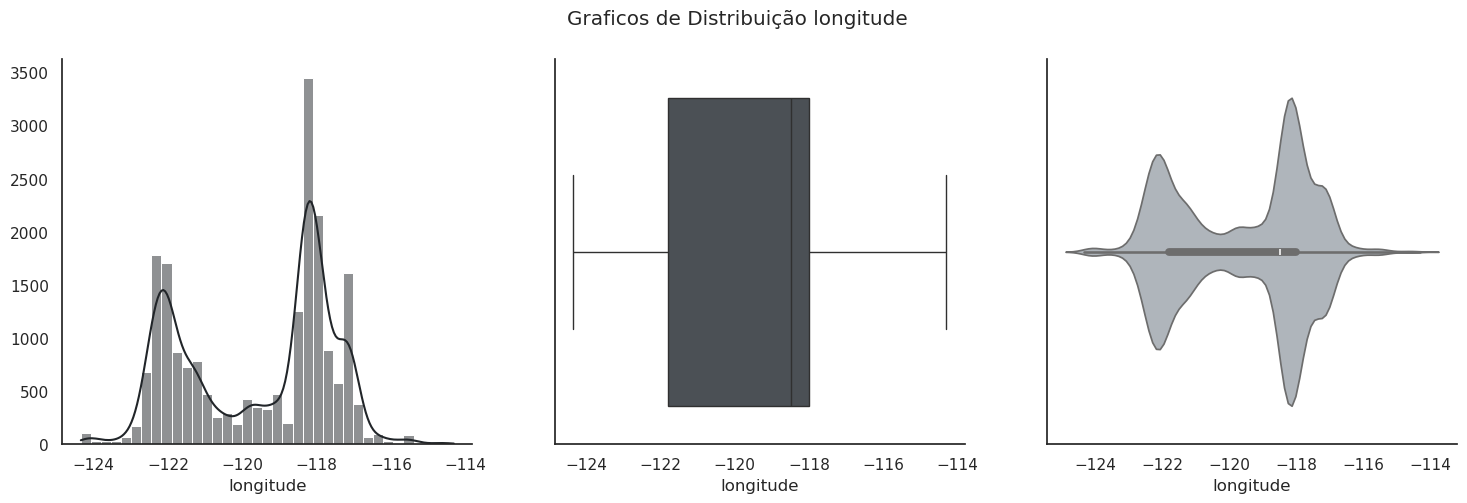

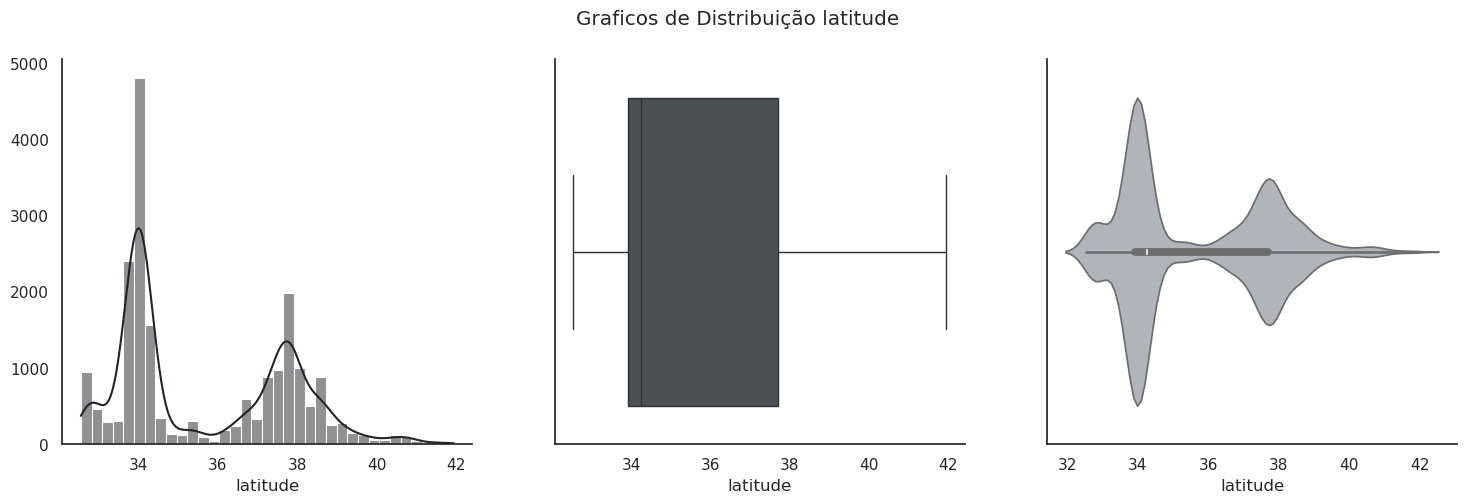

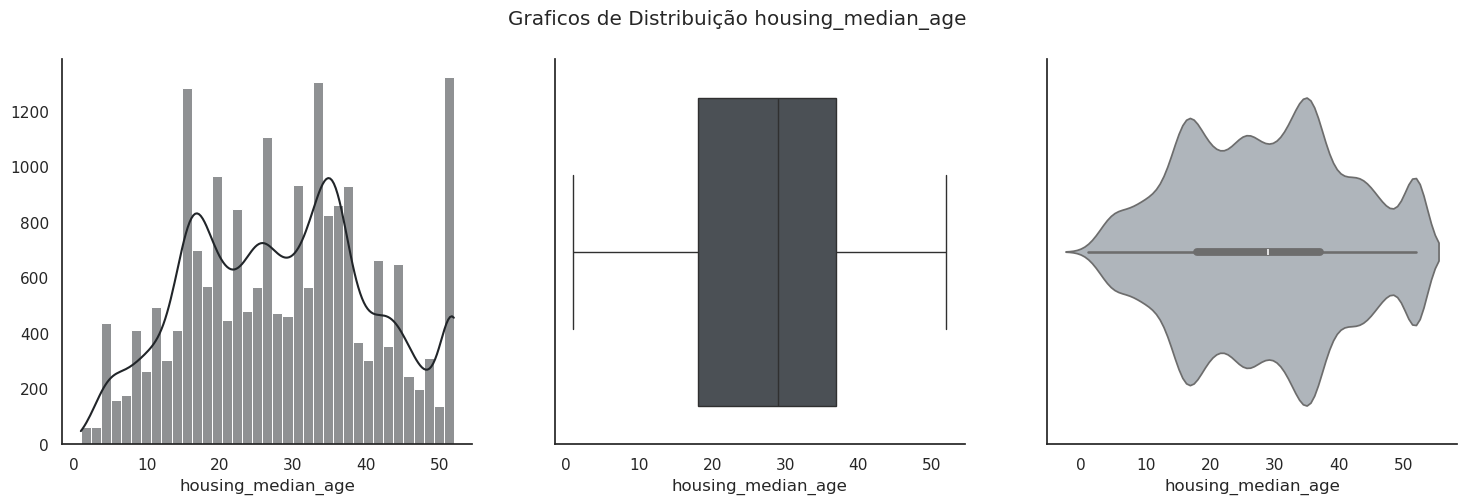

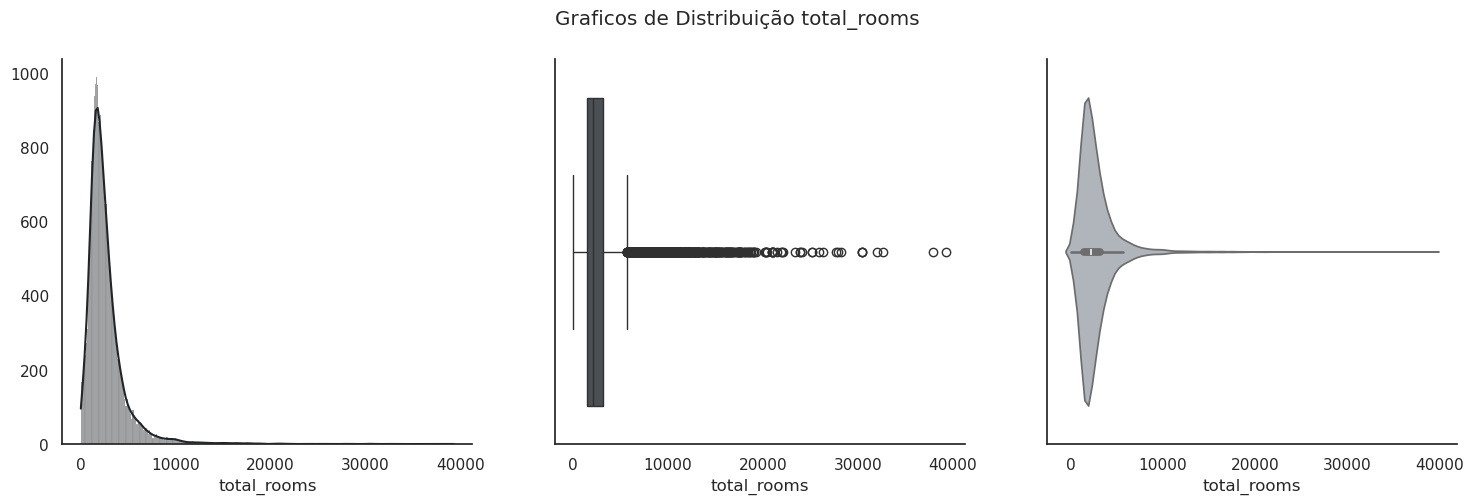

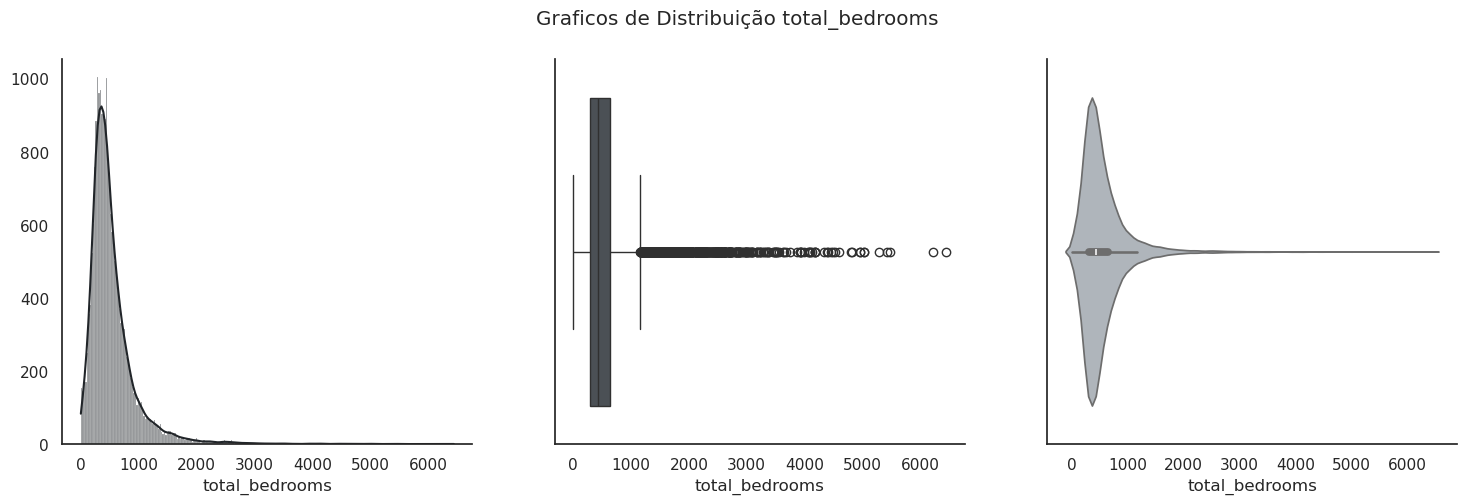

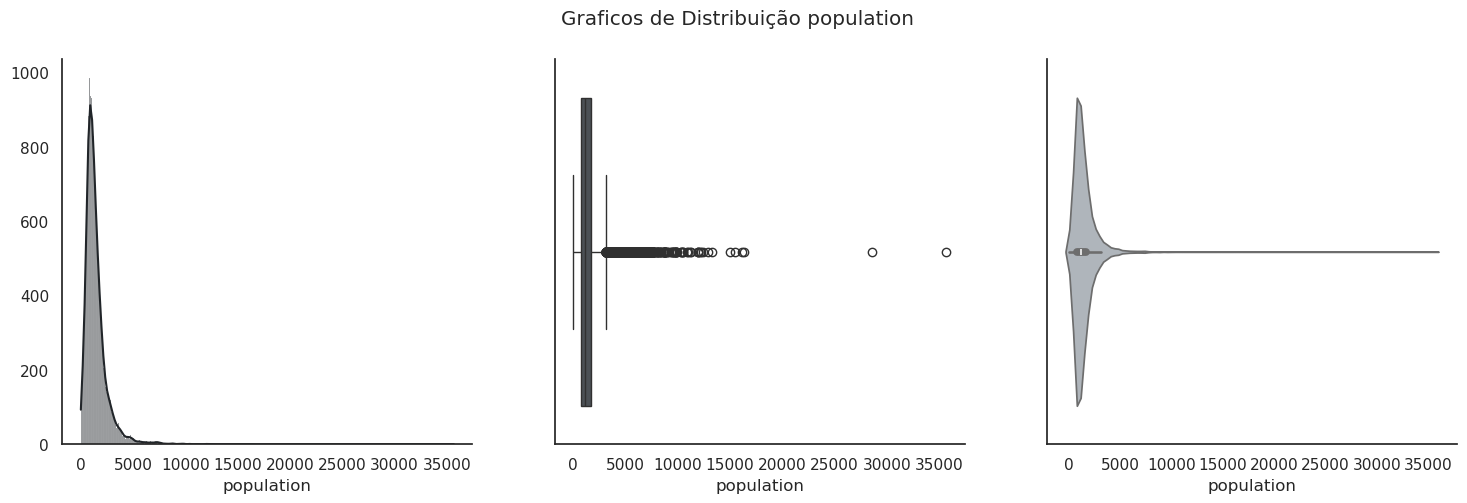

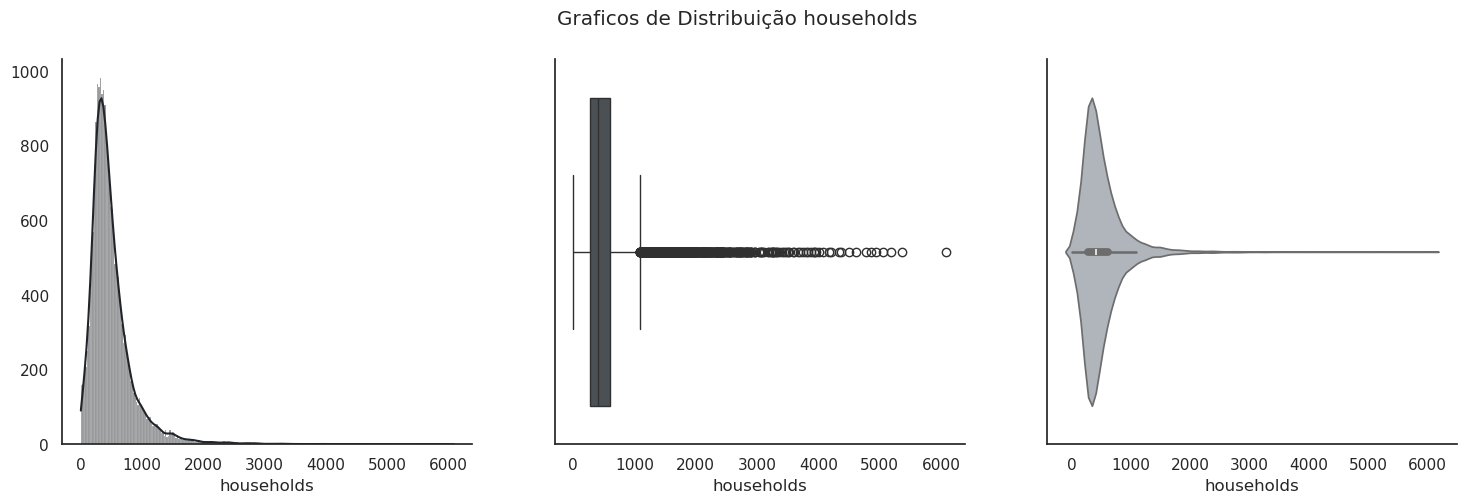

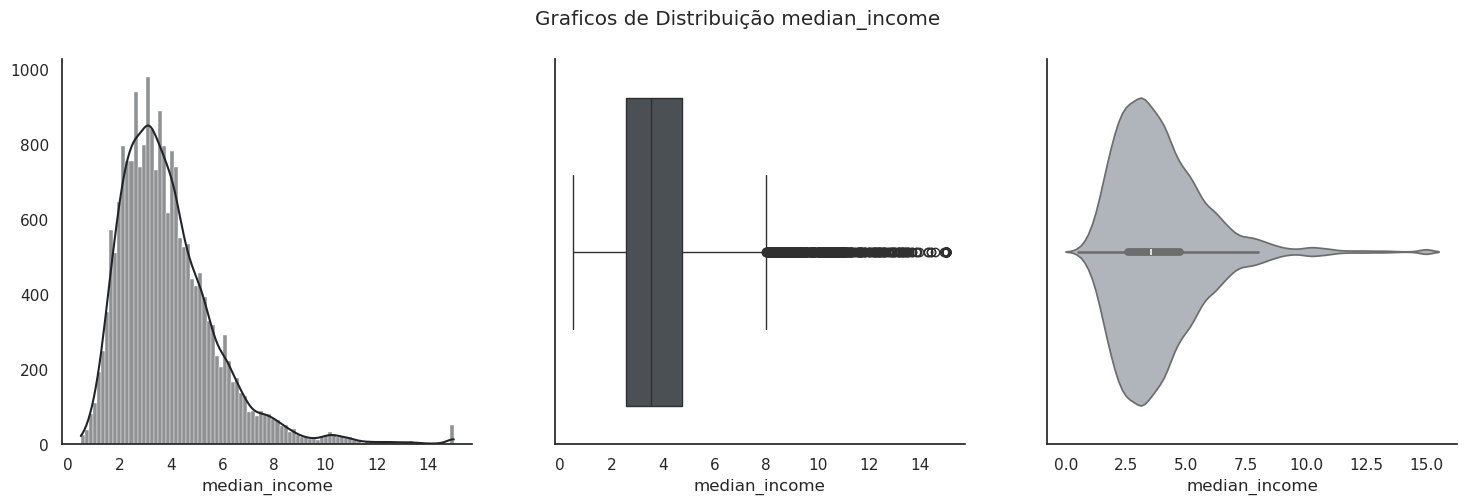

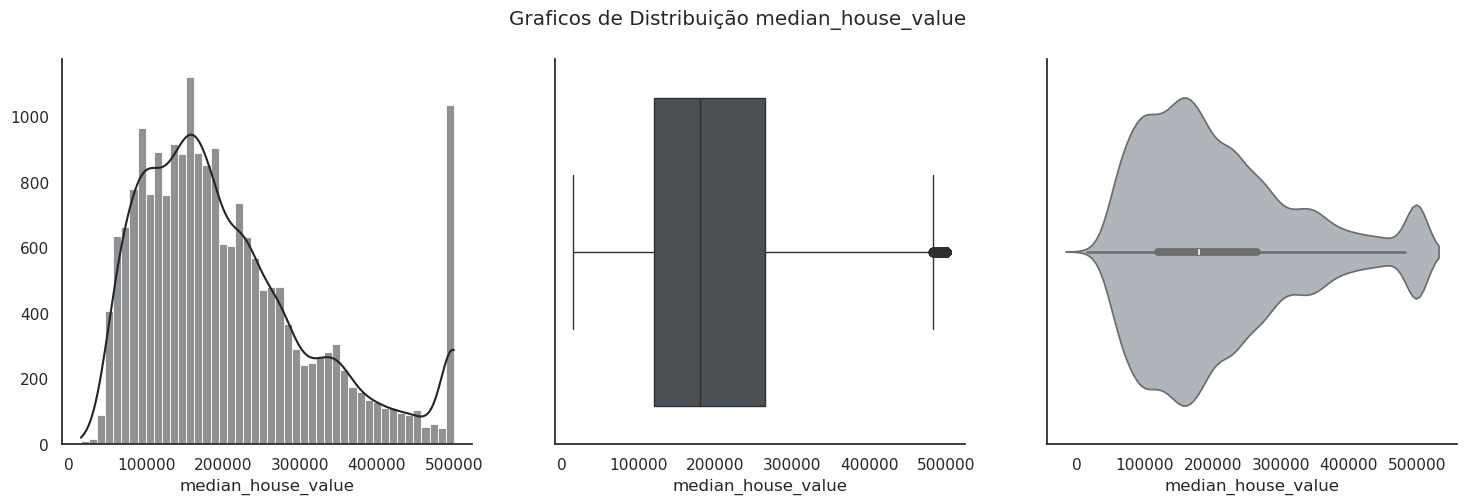

In [8]:
def distribuition_viz(col):
   
    for col in dfnums.columns:
        sns.set_theme(style="white")
        cores = [CINZA1,CINZA2,CINZA3,CINZA4,CINZA5]
        fig, axes = plt.subplots(1,3,figsize=(18,5))
        fig.suptitle(f"Graficos de Distribuição {col}")
        
        sns.histplot(dfnums,x=col,ax=axes[0],kde=True,color=CINZA1)
        axes[0].set_ylabel(None)
        sns.despine()

        sns.boxplot(dfnums,x=col,ax=axes[1],color=CINZA2)

        sns.despine()

        sns.violinplot(dfnums,x=col,ax=axes[2],color=CINZA3)
        
        sns.despine()


distribuition_viz([dfnums.columns])

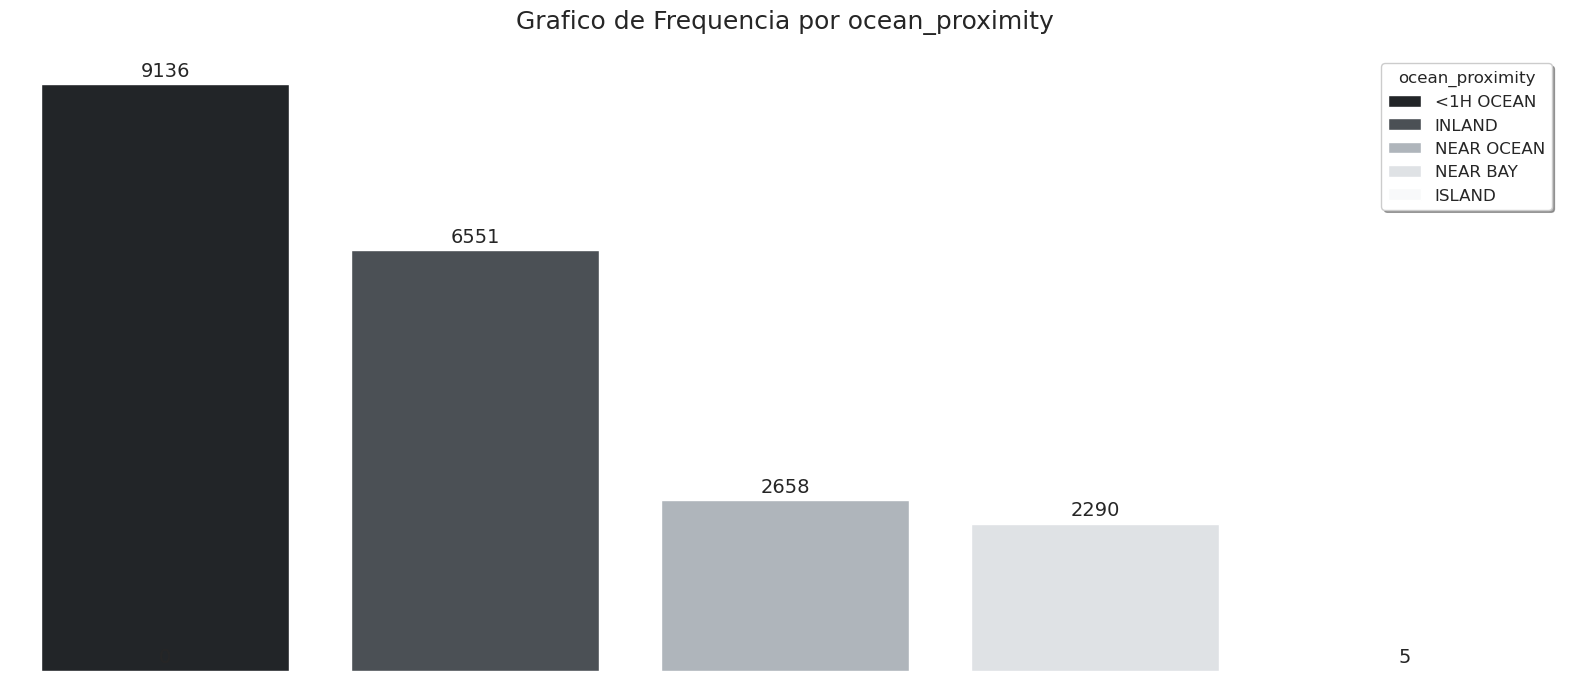

In [9]:
#grafico de frequencia de ocean_proximity

def ocean_view():
    #criando dataset
    ocean = pd.DataFrame(df['ocean_proximity'].value_counts()).reset_index()
    ocean
    #definindo tamanho da figura,tema e cores
    fig,ax = plt.subplots(figsize=(20,8))
    sns.set_theme(style="white")
    cores = [CINZA1,CINZA2,CINZA3,CINZA4,CINZA5]
    #construindo grafico
    ax = sns.barplot(data=ocean,x='ocean_proximity',y='count',palette=cores,hue='ocean_proximity',legend=True)
    #parametros do grafico
    sns.despine(bottom=True,left=True)
    ax.set_ylabel(None)
    ax.set_xlabel(None)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    plt.title('Grafico de Frequencia por ocean_proximity',fontsize=18,loc='center',y=1.03)
    ax.legend(loc='upper right',title='ocean_proximity',title_fontsize = 12, fontsize = 12,shadow=True)
    for p in ax.patches:
        value = p.get_height()
        ax.annotate(f'{int(value)}', (p.get_x() + p.get_width() / 2., value),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=14)
    

ax = ocean_view()

# Regressão Linear

## Preparando os dados

In [10]:
#criando copia do dataset
dfmodel = df.copy()

In [11]:
#transformação logaritma

dfmodel['total_rooms'] = np.log(dfmodel['total_rooms'] + 1)
dfmodel['total_bedrooms'] = np.log(dfmodel['total_bedrooms'] + 1)
dfmodel['population'] = np.log(dfmodel['population'] + 1)
dfmodel['households'] = np.log(dfmodel['households'] + 1)

#a transoformação logarítmica tem como objetivo reduzir a escala dos dados com o objetivo de facilitar a coompreensão do dados pelo modelo

In [12]:
#criar novas variaveis 
dfmodel['bedroom_ratio'] = dfmodel['total_bedrooms'] / dfmodel['total_rooms']
dfmodel['household_rooms'] = dfmodel['total_rooms'] / dfmodel['households']

#o objetivo da criação dessas variaveis é para que o modelo tenha uma melhor compreensão dos dados

In [13]:
dfmodel

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,bedroom_ratio,household_rooms
0,-122.23,37.88,41,6.781058,4.867534,5.777652,4.844187,8.3252,NEAR BAY,452600,0.717813,1.399834
1,-122.22,37.86,21,8.867850,7.009409,7.784057,7.037906,8.3014,NEAR BAY,358500,0.790429,1.260013
2,-122.24,37.85,52,7.291656,5.252273,6.208590,5.181784,7.2574,NEAR BAY,352100,0.720313,1.407171
3,-122.25,37.85,52,7.150701,5.463832,6.326149,5.393628,5.6431,NEAR BAY,341300,0.764097,1.325768
4,-122.25,37.85,52,7.395108,5.638355,6.338594,5.560682,3.8462,NEAR BAY,342200,0.762444,1.329892
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,7.418181,5.926926,6.740519,5.802118,1.5603,INLAND,78100,0.798973,1.278530
20636,-121.21,39.49,18,6.548219,5.017280,5.877736,4.744932,2.5568,INLAND,77100,0.766205,1.380045
20637,-121.22,39.43,17,7.720905,6.186209,6.915723,6.073045,1.7000,INLAND,92300,0.801228,1.271340
20638,-121.32,39.43,18,7.528869,6.016157,6.609349,5.857933,1.8672,INLAND,84700,0.799078,1.285243


In [14]:
#transformação da variavel categorica ocean_proximity em uma variavel numerica utilizando a função get_dummies do pandas para que o modelo possa utilizar essa variavel
dfmodel = dfmodel.join(pd.get_dummies(dfmodel.ocean_proximity)).drop(['ocean_proximity'], axis=1)
dfmodel

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,bedroom_ratio,household_rooms,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,6.781058,4.867534,5.777652,4.844187,8.3252,452600,0.717813,1.399834,False,False,False,True,False
1,-122.22,37.86,21,8.867850,7.009409,7.784057,7.037906,8.3014,358500,0.790429,1.260013,False,False,False,True,False
2,-122.24,37.85,52,7.291656,5.252273,6.208590,5.181784,7.2574,352100,0.720313,1.407171,False,False,False,True,False
3,-122.25,37.85,52,7.150701,5.463832,6.326149,5.393628,5.6431,341300,0.764097,1.325768,False,False,False,True,False
4,-122.25,37.85,52,7.395108,5.638355,6.338594,5.560682,3.8462,342200,0.762444,1.329892,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,7.418181,5.926926,6.740519,5.802118,1.5603,78100,0.798973,1.278530,False,True,False,False,False
20636,-121.21,39.49,18,6.548219,5.017280,5.877736,4.744932,2.5568,77100,0.766205,1.380045,False,True,False,False,False
20637,-121.22,39.43,17,7.720905,6.186209,6.915723,6.073045,1.7000,92300,0.801228,1.271340,False,True,False,False,False
20638,-121.32,39.43,18,7.528869,6.016157,6.609349,5.857933,1.8672,84700,0.799078,1.285243,False,True,False,False,False


<Axes: >

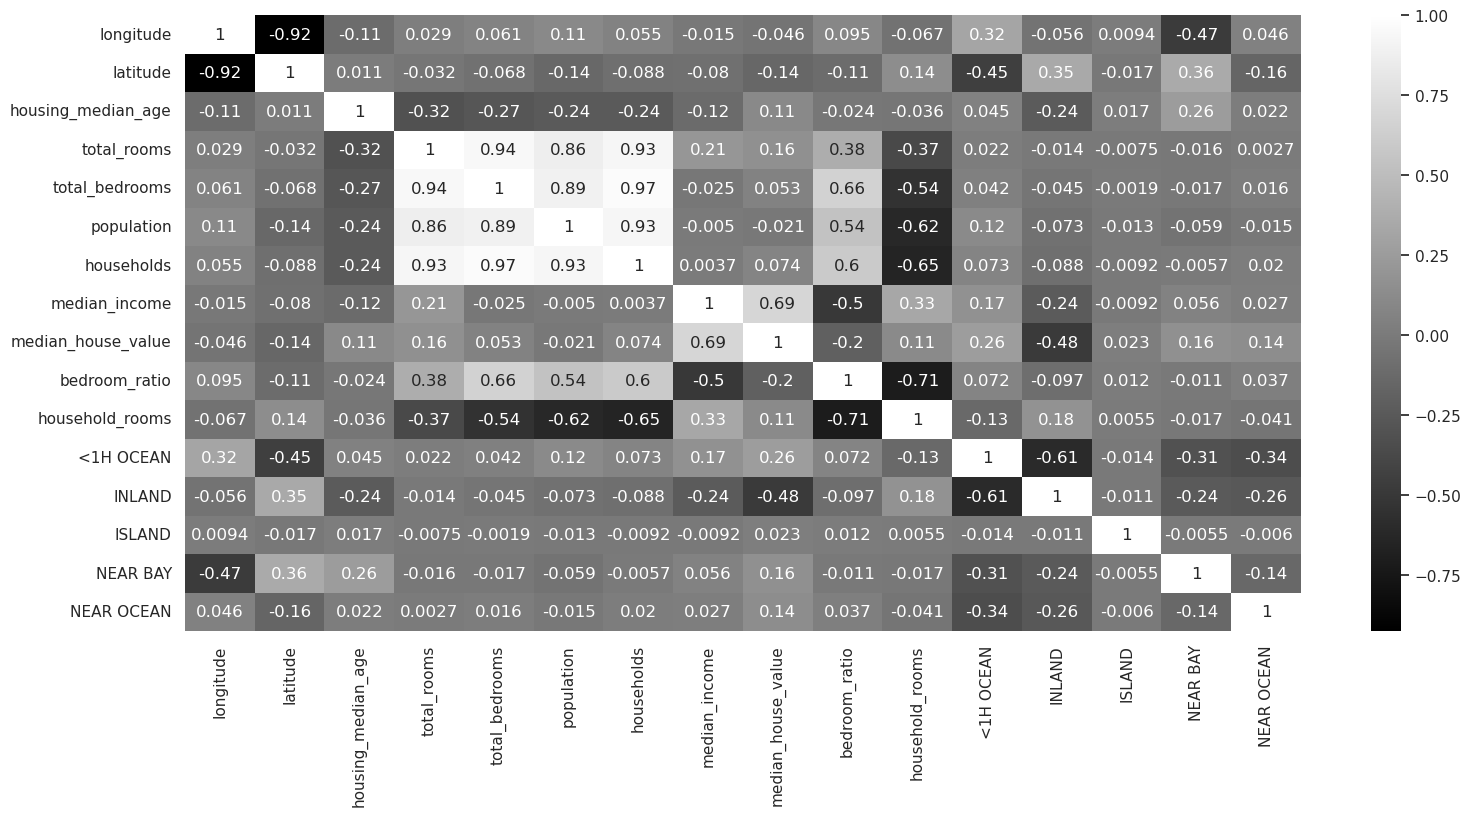

In [15]:
#mapa de calor do dataset

plt.figure(figsize=(18,8))
sns.heatmap(dfmodel.corr(),annot=True,cmap='grey')

In [16]:
#separando os dados em treino e teste

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(dfmodel.drop(['median_house_value'], axis=1)) #utilizando o standardscaler para padronizar os dados
y = dfmodel['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=42)


## Regressão Linear

In [17]:
#importando o modelo
from sklearn.linear_model import LinearRegression

reg = LinearRegression() #instanciando o modelo

reg.fit(X_train, y_train) #treinando o modelo

LinearRegression()

In [18]:
#usando dados de teste para fazer uma previsão do modelo

y_pred = reg.predict(X_test)
y_pred

array([ 52432.08589424, 111120.08589424, 238096.08589424, ...,
       245984.08589424, 132528.08589424, 211888.08589424])

In [19]:
#importando metricas de avaliação do modelo
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error

print(f'R2 Score: {r2_score(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'Median Absolute Error: {median_absolute_error(y_test, y_pred)}')




R2 Score: 0.6522016529593819
MSE: 4564992799.221763
RMSE: 67564.73043846
Median Absolute Error: 37030.085894241405


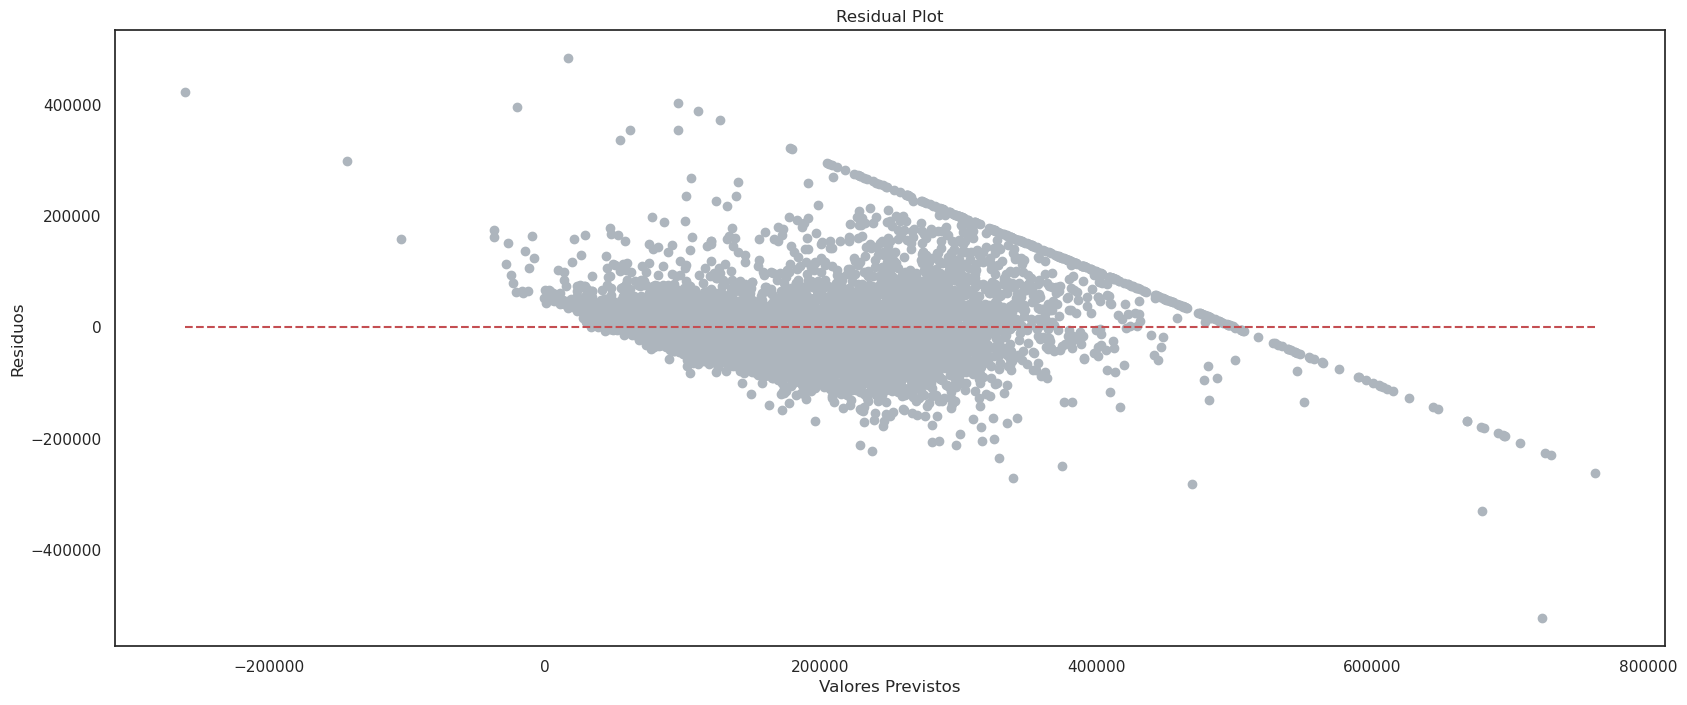

In [20]:
def residual_plot():
    residuals = y_test - y_pred
    fig,ax = plt.subplots(figsize=(20,8))
    ax = plt.scatter(y_pred, residuals,color=CINZA3)
    plt.hlines(0, min(y_pred), max(y_pred), colors='r', linestyles='dashed')
    plt.xlabel('Valores Previstos')
    plt.ylabel('Residuos')
    plt.title('Residual Plot')
    plt.show()

ax = residual_plot()

Concusão

* O tratamento dos dados é essencial para normalizar distorções e codificar as variaveis categoricas
* A Vizualização dos dados mostra padrões ocultos
* Considerando as metricas, o modelo está performando bem mas acho necessario o uso de outro metodo para avaliar melhor

Aviso: Esse projeto terá outras etapas para que possamos nos aprofundar mais nos dados